In [1]:
# Compile and import local pyrossgeo module
import os, sys
owd = os.getcwd()
os.chdir('../../../')
sys.path.insert(0,'../../../')
!sh local_setup.sh
os.chdir(owd)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyrossgeo

import datetime
import time

Compiling pyrossgeo/_initialization.pyx because it changed.
[1/1] Cythonizing pyrossgeo/_initialization.pyx
running build_ext
building 'pyrossgeo._initialization' extension
gcc -pthread -B /home/lukas/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/lukas/anaconda3/include/python3.7m -c pyrossgeo/_initialization.c -o build/temp.linux-x86_64-3.7/pyrossgeo/_initialization.o
In file included from /usr/include/numpy/ndarraytypes.h:1809:0,
                 from /usr/include/numpy/ndarrayobject.h:18,
                 from /usr/include/numpy/arrayobject.h:4,
                 from pyrossgeo/_initialization.c:612:
/usr/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^~~~~~~
gcc -pthread -shared -B /home/lukas/anaconda3/compiler_compat -L/home/luk

Simulation parameters

In [2]:
model_path = 'model.json' 
commuter_networks_path = 'commuter_networks.csv'
node_parameters_path = 'node_parameters.csv'
cnode_parameters_path = 'cnode_parameters.csv' 
contact_matrices_path = 'contact_matrices.json' 
node_cmatrices_path = 'node_cmatrices.csv' 
cnode_cmatrices_path = 'cnode_cmatrices.csv' 
node_positions_path = 'node_positions.csv' 
node_populations_path = 'node_populations.csv' 

Simulation settings

In [3]:
t_start = 0
t_end = 24*60*100

_, dts = pyrossgeo.utils.get_dt_schedule([
    (0,  1*60),
    (7*60,  1),
    (10*60, 2*60),
    (17*60, 1),
    (19*60, 2*60)
], end_time=24*60)

Run simulation

In [4]:
sim = pyrossgeo.Simulation()

X_state = sim.initialize(model_path, commuter_networks_path,
                            node_parameters_path, cnode_parameters_path,
                            contact_matrices_path, node_cmatrices_path, cnode_cmatrices_path,
                            node_populations_path)

start_time = time.time()
dX_state = np.zeros(X_state.size)
sim_data = sim.simulate(X_state, t_start, t_end, dts, steps_per_save=1)
end_time = time.time()
sim_time = (end_time - start_time)/(60*60)
print("Simulation complete. Run-time (h): %s" % sim_time)

ts, node_data, cnode_data, location_data, community_data, network_data = pyrossgeo.utils.get_simulation_data(sim_data)

ts_days = ts / (24*60)
ts_hours = ts / 60

Simulation complete. Run-time (h): 9.712775548299154e-06


/home/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "commuter_networks.csv"
  


## Plot data

Text(0.5, 0, 'Days')

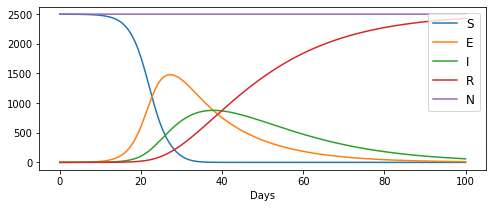

In [5]:
plt.figure( figsize=(8,3) )

S = np.sum(network_data[:,:,0], axis=1)
E = np.sum(network_data[:,:,1], axis=1)
I = np.sum(network_data[:,:,2], axis=1)
R = np.sum(network_data[:,:,3], axis=1)
N = S + E + I + R

plt.plot(ts_days, S, label="S")
plt.plot(ts_days, E, label="E")
plt.plot(ts_days, I, label="I")
plt.plot(ts_days, R, label="R")
plt.plot(ts_days, N, label="N")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')